## Fundamental CNN
1. Input Data (Gambar)
- Gambar sederhana → input
2. Kernel / Filter
- Kernel acak → filter
3. Convolution Operation
- Konvolusi → feature map
4. Prediction & Loss Function
- Loss → ukuran kesalahan
5. Backpropagation & Gradient
- Backprop → update kernel
6. Training Loop
- Training loop → proses belajar >> kernel -= lr * grad
7. Visualisasi Kernel & Loss
- Visualisasi → bukti kernel belajar

Bentuk :  (28, 28)
Matrik asli :  [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]]

 Bentuk Norm :  (28, 28)

 Matrik Norm :  [[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0. 

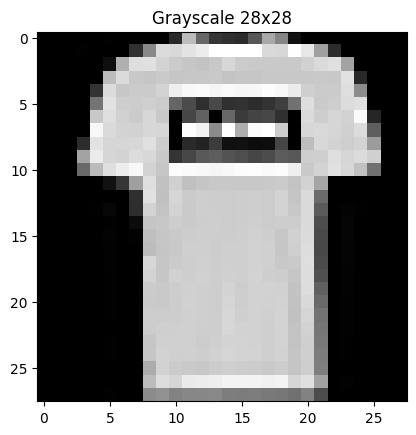

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load gambar asli (misalnya "gambar.jpg") dalam mode grayscale
img_gray = cv2.imread("data/fashion/kaos.png", cv2.IMREAD_GRAYSCALE)

# Resize ke 28x28
img_gray_resized = cv2.resize(img_gray, (28, 28))
print("Bentuk : " ,img_gray_resized.shape)
print("Matrik asli : " ,img_gray_resized[:5])

# Normalisasi ke skala 0-1 (opsional)
img_gray_norm = img_gray_resized / 255.0
print("\n Bentuk Norm : " ,img_gray_norm.shape)
print("\n Matrik Norm : " ,img_gray_norm[:5])

print("Shape grayscale:", img_gray_resized.shape)  # (28, 28)

# Visualisasi
plt.imshow(img_gray_resized, cmap='gray')
plt.title("Grayscale 28x28")
plt.show()

Shape grayscale: (32, 32)


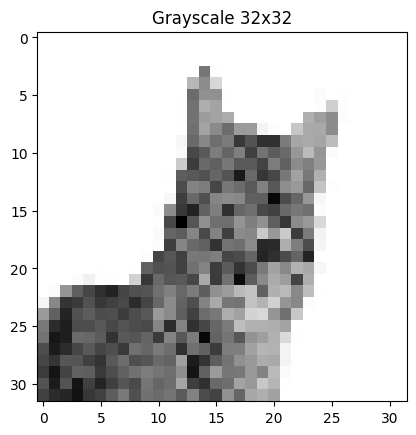

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load gambar asli (misalnya "gambar.jpg") dalam mode grayscale
img_gray = cv2.imread("data/lain/cat.jpeg", cv2.IMREAD_GRAYSCALE)

# Resize ke 32x32
img_gray_resized = cv2.resize(img_gray, (32, 32))

# Normalisasi ke skala 0-1 (opsional)
img_gray_norm = img_gray_resized / 255.0

print("Shape grayscale:", img_gray_resized.shape)  # (32, 32)

# Visualisasi
plt.imshow(img_gray_resized, cmap='gray')
plt.title("Grayscale 32x32")
plt.show()

Shape RGB: (224, 224, 3)


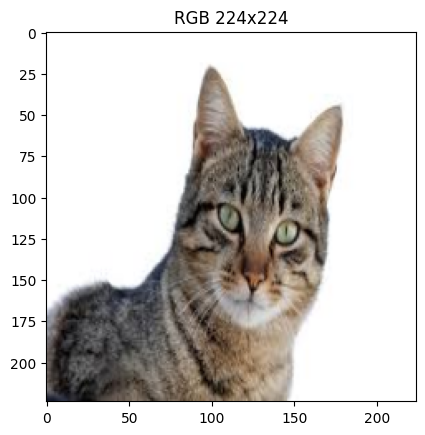

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load gambar asli dalam mode BGR (default OpenCV)
img_bgr = cv2.imread("data/lain/cat.jpeg", cv2.IMREAD_COLOR)

# Konversi BGR → RGB (karena OpenCV default BGR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Resize ke 224x224
img_rgb_resized = cv2.resize(img_rgb, (224, 224))

# Normalisasi ke skala 0-1 (opsional)
img_rgb_norm = img_rgb_resized / 255.0

print("Shape RGB:", img_rgb_resized.shape)  # (224, 224, 3)

# Visualisasi
plt.imshow(img_rgb_resized)
plt.title("RGB 224x224")
plt.show()

Shape batch: (3, 64, 64, 3)


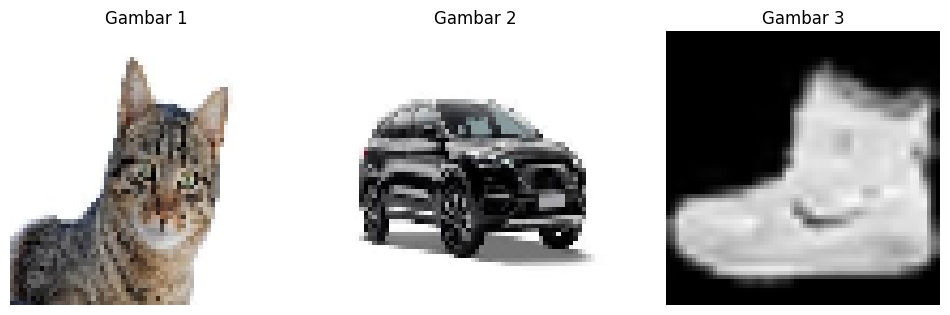

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Daftar file gambar
files = ["data/lain/cat.jpeg", "data/lain/gambar1.jpeg", "data/lain/gambar1.png"]

# Parameter ukuran target (misalnya 64x64 RGB)
target_size = (64, 64)

batch = []

for f in files:
    # Load gambar dalam mode BGR
    img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
    
    # Konversi ke RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Resize ke target size
    img_resized = cv2.resize(img_rgb, target_size)
    
    # Normalisasi ke skala 0-1
    img_norm = img_resized / 255.0
    
    # Tambahkan ke batch
    batch.append(img_norm)

# Ubah list menjadi numpy array
batch_array = np.array(batch, dtype=np.float32)

print("Shape batch:", batch_array.shape)  # (3, 64, 64, 3)

# Visualisasi ketiga gambar
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i, ax in enumerate(axes):
    ax.imshow(batch_array[i])
    ax.set_title(f"Gambar {i+1}")
    ax.axis("off")
plt.show()

Ditemukan file: ['data/lain/gambar1.jpeg', 'data/lain/cat.jpeg', 'data/lain/gambar1.png']
Shape batch: (3, 64, 64, 3)


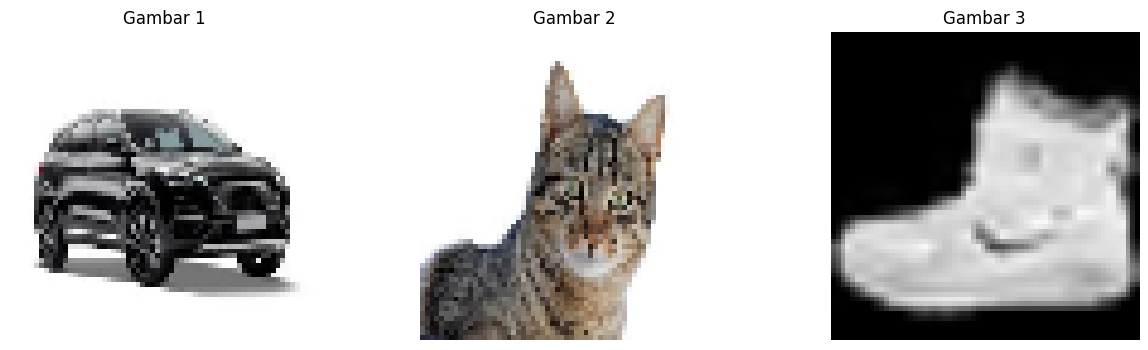

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Folder tempat gambar disimpan
folder_path = "data/lain/"   # misalnya folder bernama 'data'

# Ambil semua file .jpg dalam folder
files = glob.glob(os.path.join(folder_path, "*.*"))

print("Ditemukan file:", files)

# Parameter ukuran target (misalnya 64x64 RGB)
target_size = (64, 64)

batch = []

for f in files:
    # Load gambar dalam mode BGR
    img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
    
    # Konversi ke RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Resize ke target size
    img_resized = cv2.resize(img_rgb, target_size)
    
    # Normalisasi ke skala 0-1
    img_norm = img_resized / 255.0
    
    # Tambahkan ke batch
    batch.append(img_norm)

# Ubah list menjadi numpy array
batch_array = np.array(batch, dtype=np.float32)

print("Shape batch:", batch_array.shape)  # (N, 64, 64, 3)

# Visualisasi beberapa gambar
fig, axes = plt.subplots(1, min(len(batch_array), 5), figsize=(15,4))
for i, ax in enumerate(axes):
    ax.imshow(batch_array[i])
    ax.set_title(f"Gambar {i+1}")
    ax.axis("off")
plt.show()